<a href="https://colab.research.google.com/github/subhajit2001/Deep-Learning/blob/main/Pytorch_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing the necessary Libraries

* Packages used : Pytorch, Matplotlib
* Dataset used : MNIST

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F



---



#### Loading the dataset

Downloading the MNIST dataset from **torchvision.datasets** preset library and loading the dataset into a root disk folder 'data'

In [3]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15834795.06it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 484843.38it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4391039.37it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5940295.84it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw





---



#### Exploratory Data Analysis

* Getting some characteristics of the dataset before working on it

* Getting the length of the whole training 'dataset' and also inspecting the type of the dataset

In [4]:
len(dataset), type(dataset)

(60000, torchvision.datasets.mnist.MNIST)

* Downloading the test dataset and storing it into the root folder 'data' and giving train as false, so that the model is not destined to train on it
* Inspecting the length and type of the 'test_dataset'

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset), type(test_dataset)

(10000, torchvision.datasets.mnist.MNIST)

* Getting the type of a single dataset record that is a single image
* Inspecting the type of the image, which is a pillow image and the size of it is 28px X 28px and the image is of label(number 5)

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

* Extracting the image record and label of the image from the first dataset record
* Showing the image on a graph, to visualize the image using the pixel data
* Printing out the original label of the image

Label: 5


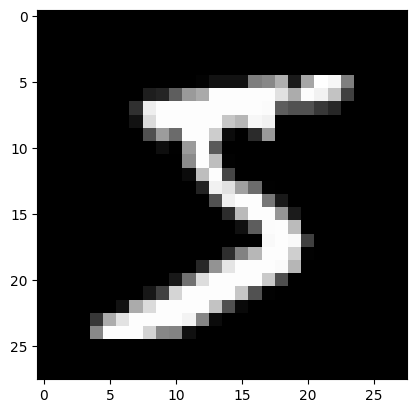

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

* Repeating the same process in another dataset record

Label: 3


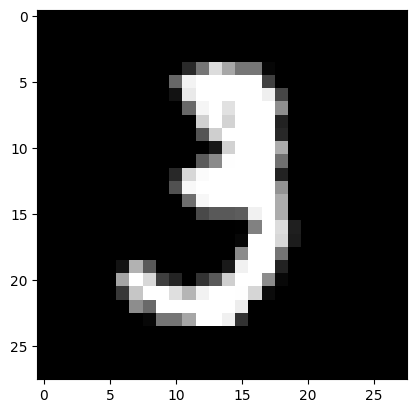

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)



---



#### Loading the dataset as a Training Dataset and performing EDA

* Storing the training dataset into the root folder'data'
* Training attribute is mentioned as true, so the dataset can be used for training a model
* The dataset when is loaded is transformed into a tensor, which is a special datatype used in Pytorch

In [9]:
# Pytorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded.
# The torchvsion.transforms module contains many such predefined functions. We'll use the ToTensor transform to convert images into Pytorch Tensors
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

* Getting the image data and labels seperately from the dataset record
* Inspecting the shape of the data and how it is distributed along with the label of the image

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# 1st value -> Channel, Height(px), Width(px)

torch.Size([1, 28, 28]) 5


Inspecting the image data and how it's distributed
* The data is a 3D Data of one channel
* It is a set of 28 lists containing 28 elements each
* It resembles 28 rows and each row containing 28 pixels each

In [11]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Inspecting a subset of pixels data from 28x28 image
* From the first dimension i.e. single channel, extract the 10th pixel to 15th pixel data from the 10th row to 15th row
* Getting the maximum and minimum pixel value from the first image record

In [12]:
print(img_tensor[0,10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


Getting to visualize the above subset data extracted to a image plot in matplotlib which will extract a particular portion of image in form of pixels data

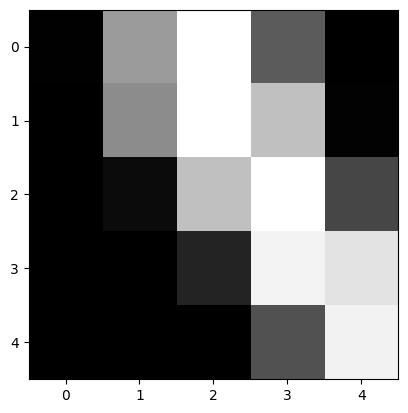

In [13]:
plt.imshow(img_tensor[0,10:15, 10:15], cmap='gray')



---



#### Performing a random split of dataset into Training and Validation dataset
* Training dataset consist of 50,000 rows and validation dataset consists of 10,000 rows
* The whole dataset will be randomly split into the specific rows and records

In [14]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)



---



#### Preparing the Training Dataset loader object

* The training dataset loader will contain a DataLoader object, with a specific batch size and the training dataset object and the dataset will be shuffled using the shuffle=True attribute
* The validation dataset loader will also be generated from the validation dataset using the specific batch size
* These dataset loader object will help during the training and validation of deep learning models

In [15]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [81]:
print(train_loader.batch_size)

128




---



#### Model Preparation

* Specifying the input size as a 28px*28px image
* The number of predictor classes are 10
* Initializing a Linear model with 784 inputs and 10 outputs
* The linear model will be initializing some starting weights to the respective inputs

In [70]:
# Model
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Inspecting the model size

* The model has initialized 784 weights for each of the 10 classes
* On calculation with these 784 weights, the final output decided the outcome of the model

In [71]:
model.weight.shape, model.weight

(torch.Size([10, 784]),
 Parameter containing:
 tensor([[-0.0006, -0.0010, -0.0102,  ...,  0.0211,  0.0263, -0.0034],
         [ 0.0226, -0.0127,  0.0160,  ...,  0.0218, -0.0311,  0.0127],
         [-0.0080, -0.0226,  0.0229,  ..., -0.0262, -0.0209,  0.0164],
         ...,
         [ 0.0055,  0.0297,  0.0335,  ...,  0.0090,  0.0262, -0.0193],
         [ 0.0266,  0.0245, -0.0087,  ...,  0.0243,  0.0330, -0.0174],
         [ 0.0196,  0.0224,  0.0121,  ..., -0.0199, -0.0043, -0.0250]],
        requires_grad=True))

In [74]:
# Inspecting the model weights(784) for the number 9
model.weight[9]

tensor([ 1.9636e-02,  2.2447e-02,  1.2086e-02, -3.4877e-02, -7.6594e-03,
        -2.5894e-02,  7.4676e-04,  3.5293e-02,  3.2928e-02,  1.4939e-02,
         1.4438e-02, -2.4565e-02, -9.6838e-03,  7.0768e-03, -1.5067e-02,
         5.6306e-03, -1.4733e-02, -7.8417e-03, -1.5211e-02, -1.7242e-03,
        -9.2878e-04,  1.1489e-02, -8.7501e-03, -4.6878e-03, -1.0401e-02,
        -3.2626e-02,  6.9230e-03,  9.9894e-03, -1.9990e-02,  3.2235e-02,
         8.5126e-03,  2.8107e-02, -3.7153e-03,  1.4167e-02, -2.9219e-02,
        -2.3301e-02, -2.1516e-02, -2.3534e-02,  2.7745e-02, -6.2790e-03,
         3.5409e-02,  9.5321e-03, -2.7888e-02, -5.6761e-04,  2.5499e-02,
        -1.7316e-02,  1.4037e-02,  1.6788e-02, -1.5029e-02, -2.3135e-02,
         1.0589e-02, -2.8120e-02, -3.3865e-02,  9.3379e-03,  1.3548e-02,
         1.6971e-02,  1.6586e-02, -1.3733e-02, -2.8057e-02, -7.8546e-03,
         2.5676e-02,  2.9128e-03,  1.3835e-02, -2.0043e-02,  7.8446e-03,
        -1.2604e-02,  3.4713e-03,  1.6591e-02,  2.8

After calculating the multiplied output with weights a bias is added
* A different bias is added for each of the class

In [18]:
model.bias.shape, model.bias

(torch.Size([10]),
 Parameter containing:
 tensor([-0.0184,  0.0303,  0.0066,  0.0264, -0.0113,  0.0145,  0.0216,  0.0336,
         -0.0140, -0.0186], requires_grad=True))

With the original initialized weights of the model:

* The images records and the corresponding labels are extracted from the training dataset loader
* The images records are returned in the form of 128 images with (1,28,28) as dimensions. And so it's converted into a shape understood by the Neural Network
* The model predicts on the trainig data when the images data is passed to the modelm the predictions are stored in outputs variable

In [19]:
for images, labels in train_loader:
  print(labels, images.shape)
  images = images.reshape(128, 784) # reshaping (128, 1, 28, 28) to (128, 784)
  outputs = model(images)
  break

tensor([9, 5, 7, 4, 3, 7, 8, 4, 5, 9, 1, 9, 2, 2, 8, 7, 8, 8, 1, 9, 0, 3, 5, 7,
        1, 1, 2, 1, 8, 7, 4, 1, 9, 5, 0, 9, 2, 8, 7, 4, 3, 7, 0, 6, 3, 6, 8, 3,
        5, 6, 4, 1, 2, 9, 1, 8, 4, 2, 2, 0, 4, 6, 1, 9, 3, 7, 7, 3, 0, 3, 2, 2,
        0, 6, 4, 5, 2, 7, 7, 9, 6, 6, 4, 1, 5, 6, 1, 4, 3, 1, 6, 7, 1, 7, 6, 1,
        9, 8, 6, 5, 8, 1, 8, 6, 0, 1, 0, 7, 7, 8, 8, 5, 3, 0, 6, 7, 7, 0, 7, 7,
        6, 6, 6, 9, 2, 4, 0, 2]) torch.Size([128, 1, 28, 28])




---



#### Initializing the Model

* In the constructor of the model, a Linear Layers is added with an input size of 784 and number of classes to be predicted are 10
* Reshaping the data to (784)  and passing it into the linear layer and finally returning the outputs

In [76]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
model = MnistModel()

Inspecting the model linear layer structure

In [77]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

* Inspecting the shapes of the initial weights and bias of the Linear Layer of the model
* Inspecting the weights and biases of the model using the `model.parameters()` functions

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0346, -0.0170,  0.0215,  ..., -0.0307,  0.0356,  0.0157],
         [ 0.0306, -0.0288, -0.0289,  ...,  0.0147, -0.0078,  0.0040],
         [ 0.0056,  0.0014, -0.0105,  ...,  0.0254, -0.0049,  0.0321],
         ...,
         [-0.0286,  0.0323, -0.0082,  ...,  0.0154, -0.0312,  0.0233],
         [ 0.0350, -0.0336, -0.0349,  ...,  0.0090,  0.0049,  0.0146],
         [ 0.0041,  0.0248,  0.0022,  ..., -0.0274,  0.0223,  0.0205]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0167,  0.0208, -0.0343, -0.0323, -0.0006,  0.0129, -0.0266,  0.0136,
         -0.0120, -0.0024], requires_grad=True)]



---



#### Model Predictions

* Extracting the images and labels data from training data loader and passing it into the model for prediction
* The predictions are stored in the outputs variable
* Outputs variable is containing the data for 128 images from 1st batch
* It's containing the weighted sum of the pixel data including the bias for each of the 10 classes for each image

In [23]:
for images, labels in train_loader:
  outputs = model(images)
  break
# Outputs for 128 images for each of the 10 classes
print('outputs.shape : ',outputs.shape)
print('Sample outputs : ',outputs.data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :  tensor([[-0.1915,  0.1377, -0.1440,  ...,  0.2962, -0.0069, -0.1654],
        [ 0.1117,  0.4058, -0.3833,  ...,  0.5875,  0.0226, -0.1216],
        [ 0.1162,  0.1235,  0.0454,  ...,  0.0697, -0.1791,  0.2182],
        ...,
        [-0.2570,  0.0227, -0.2001,  ...,  0.2298, -0.3910, -0.0931],
        [ 0.2805, -0.1193, -0.0186,  ...,  0.3970, -0.0898,  0.1806],
        [ 0.0663,  0.0218, -0.0297,  ...,  0.2872, -0.3791,  0.0543]])


Computing the softmax function on each of the computed sum for each of the 10 classes for each of the 128 images, finally totalled over for all the classes leads to 1

In [82]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)
print('Probabilities Shape : ', probs.shape)
print('Sample Probabilities : ', probs.data)
print("Sum : ", torch.sum(probs, dim=1))

Probabilities Shape :  torch.Size([128, 10])
Sample Probabilities :  tensor([[0.0832, 0.1156, 0.0872,  ..., 0.1354, 0.1000, 0.0854],
        [0.0998, 0.1339, 0.0608,  ..., 0.1606, 0.0913, 0.0790],
        [0.1043, 0.1051, 0.0972,  ..., 0.0996, 0.0777, 0.1155],
        ...,
        [0.0765, 0.1012, 0.0810,  ..., 0.1245, 0.0669, 0.0901],
        [0.1269, 0.0851, 0.0941,  ..., 0.1426, 0.0876, 0.1148],
        [0.1028, 0.0983, 0.0934,  ..., 0.1282, 0.0659, 0.1016]])
Sum :  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000

Using the `torch.max()` function and over full row, getting the maximum probability for out of all the 10 classes and extracting the class

In [25]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 7, 9, 7, 7, 3, 7, 9, 7, 7, 7, 7, 7, 7, 0, 7, 7, 1, 3, 3, 5, 3, 7, 7,
        9, 2, 7, 1, 2, 3, 3, 3, 2, 7, 8, 1, 8, 1, 3, 7, 3, 2, 7, 8, 3, 3, 7, 7,
        7, 7, 7, 3, 7, 7, 7, 7, 5, 7, 3, 7, 3, 3, 3, 3, 7, 0, 8, 4, 3, 3, 7, 1,
        7, 5, 7, 9, 0, 7, 7, 9, 0, 7, 5, 7, 7, 5, 5, 2, 7, 7, 7, 7, 3, 7, 4, 3,
        3, 7, 7, 1, 3, 3, 4, 8, 3, 3, 7, 6, 3, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 3,
        7, 7, 3, 3, 7, 3, 7, 7])
tensor([0.1354, 0.1606, 0.1155, 0.1454, 0.1157, 0.1246, 0.1283, 0.1193, 0.1800,
        0.1348, 0.1360, 0.1206, 0.1346, 0.1281, 0.1125, 0.1378, 0.1307, 0.1304,
        0.1314, 0.1467, 0.1181, 0.1172, 0.1379, 0.1429, 0.1255, 0.1556, 0.1277,
        0.1296, 0.1421, 0.1384, 0.1261, 0.1220, 0.1156, 0.1663, 0.1410, 0.1220,
        0.1265, 0.1265, 0.1274, 0.1230, 0.1262, 0.1308, 0.1550, 0.1169, 0.1439,
        0.1232, 0.1216, 0.1284, 0.1393, 0.1431, 0.1365, 0.1217, 0.1376, 0.1618,
        0.1240, 0.1297, 0.1460, 0.1336, 0.1198, 0.1407, 0.1207, 0.1213, 0.1527,
       

Existing Labels of the 128 images from the train_loader

In [26]:
labels

tensor([3, 3, 6, 2, 4, 8, 8, 3, 3, 9, 3, 7, 4, 1, 7, 8, 8, 3, 9, 6, 6, 4, 5, 0,
        8, 0, 7, 8, 0, 6, 6, 3, 2, 7, 3, 0, 1, 3, 1, 8, 5, 0, 7, 1, 8, 0, 6, 5,
        7, 8, 9, 1, 3, 3, 2, 1, 0, 2, 5, 0, 9, 9, 8, 3, 1, 9, 3, 7, 8, 8, 5, 0,
        9, 0, 8, 1, 5, 3, 6, 1, 9, 7, 2, 2, 9, 4, 9, 5, 3, 8, 1, 3, 8, 7, 7, 9,
        5, 2, 7, 5, 1, 9, 7, 1, 9, 1, 9, 8, 5, 0, 5, 4, 6, 4, 7, 4, 7, 4, 5, 5,
        2, 4, 1, 9, 5, 8, 5, 4])

Matching the predictions with the Labels

In [27]:
preds == labels

tensor([False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False])

Getting the sum of matched labels

In [28]:
torch.sum(preds==labels)

tensor(13)

Computing the accuracy score of the predictions
* First extracting the matched classes probabilities and the prediction classes using the `torch.max()` function in a specfic row
* Computing the accuracy manually with the matched count by the total number of predictions

In [29]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [30]:
accuracy(outputs, labels)

tensor(0.1016)



---



#### Loss function

* Initializing a loss function object which is cross_entropy

In [31]:
loss_fn = F.cross_entropy

In [32]:
outputs

tensor([[-0.1915,  0.1377, -0.1440,  ...,  0.2962, -0.0069, -0.1654],
        [ 0.1117,  0.4058, -0.3833,  ...,  0.5875,  0.0226, -0.1216],
        [ 0.1162,  0.1235,  0.0454,  ...,  0.0697, -0.1791,  0.2182],
        ...,
        [-0.2570,  0.0227, -0.2001,  ...,  0.2298, -0.3910, -0.0931],
        [ 0.2805, -0.1193, -0.0186,  ...,  0.3970, -0.0898,  0.1806],
        [ 0.0663,  0.0218, -0.0297,  ...,  0.2872, -0.3791,  0.0543]],
       grad_fn=<AddmmBackward0>)

* Computing the loss function value with the mismatch of the values of outputs and labels

In [33]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3291, grad_fn=<NllLossBackward0>)




---




> **Algorithm to Train using the Training Data using multiple epochs**



```
for epoch in range(num_epochs):
  # Training phase
  for batch in train_loader:
    # Generate predictions
    # Calculate loss
    # Compute gradients
    # Update weights
    # Reset Gradients

  # Validation phase
  for batch in val_loader:
    # Generate predictions
    # Calculate loss
    # Calculate metrics (accuracy etc.)
  # Calculate average validation loss and metrics

  # Log epoch, loss and metrics for inspection

```



---

#### Model architecture

* Initialize a linear layer
* Reshaping the image data to a list of 784 pixels data
* Applying the linear layer with 784 weights on the pixels data and returning the output predictions.
* Passing the output prediction labels and the actual labels in a cross entropy loss function is also done to return the loss of the current prediction step
* From the validation step, after generating the predictions, the loss and accuracy of the current model weights w.r.t the validation data is calculated
* At the end of an epoch, the losses/accuracies are averaged from each of the batches from validation step and the report is displayed

In [88]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images) # Generate Predictions
    loss = F.cross_entropy(out, labels) # Generate Loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    # print(images.shape)
    out = self(images) # Generate Predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    acc = accuracy(out, labels) # Calculate accuracy
    return {'val_loss':loss, 'val_acc':acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss:{:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model=MnistModel()

Creation of a function to evaluate the model on validation data

* By extracting a batch of image data from validation data loader and evaluating the current model with the validation data
* Extracting the outputs as validation loss/accuracy and adding them to a list
* from the seperate model metrics from different batches, accumulating the means of the loss/accuracy and going forward with those metrics at the end of the epoch and showing it in a formatted string

In [89]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

Creation of the fit method to update the training weights of the model

* An optimizer function using Stochastic Gradient Descent is initialized using the initial model parameters and learing rate provided
* For each epoch in the specified number of epoch, the model is trained over all the batches of the training data
  * The loss from a specific batch is returned and then back propagation is done to correct the model weights
  * The optimizer is also used to optimize the weights after computing the gradients
  * After the step, the gradients are turned zero
* After the model weights have been trained for the current epoch for all batches of training data, the results are stacked for the validation data and at the end of an epoch the consolidated data for all the validation data is displayed, including the addition of result into the history

In [90]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []
  for epoch in range(epochs):
    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

The evaluation method is checked with one batch of validation data and the initial weights of the model

In [91]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3205418586730957, 'val_acc': 0.13370253145694733}



---
#### Model Training with epochs


The fit method is run 4 times with 5 epochs and 0.001 learning rate

In [50]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:0.7359, val_acc: 0.8725
Epoch [1], val_loss:1.0690, val_acc: 0.8861
Epoch [2], val_loss:1.2856, val_acc: 0.8946
Epoch [3], val_loss:1.4532, val_acc: 0.8964
Epoch [4], val_loss:1.5146, val_acc: 0.9015


In [51]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:1.6043, val_acc: 0.8986
Epoch [1], val_loss:1.6879, val_acc: 0.8990
Epoch [2], val_loss:1.7327, val_acc: 0.9005
Epoch [3], val_loss:1.8426, val_acc: 0.8967
Epoch [4], val_loss:1.8873, val_acc: 0.8959


In [52]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:1.9456, val_acc: 0.8934
Epoch [1], val_loss:1.9919, val_acc: 0.8962
Epoch [2], val_loss:2.0151, val_acc: 0.8991
Epoch [3], val_loss:2.0776, val_acc: 0.8973
Epoch [4], val_loss:2.1356, val_acc: 0.8921


In [53]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss:2.1558, val_acc: 0.8923
Epoch [1], val_loss:2.1882, val_acc: 0.8949
Epoch [2], val_loss:2.2201, val_acc: 0.8877
Epoch [3], val_loss:2.2283, val_acc: 0.8880
Epoch [4], val_loss:2.2818, val_acc: 0.8839


The loss/accuracies results are consolidated in a list and then plotted in a graph with the data vs no of epochs

Text(0.5, 1.0, 'Accuracy vs no of epochs')

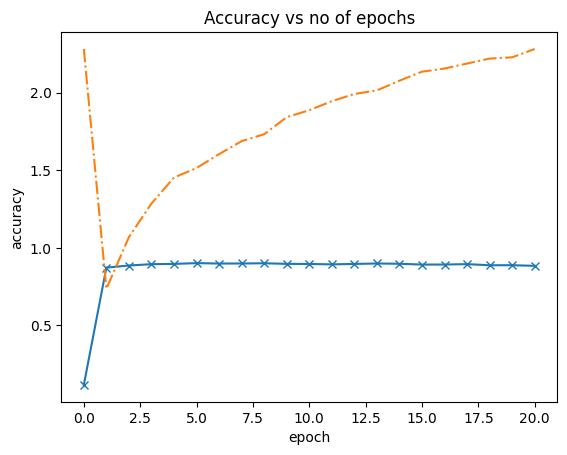

In [84]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
losses = [result['val_loss'] for result in history]
plt.plot(accuracies, '-x')
plt.plot(losses, '-.')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs no of epochs')



---

#### Model Testing on Testing Data

The testing dataset is download and stored in 'data' folder in disk and transformed into tensors

In [55]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

Visualizing an image from testing dataset

Shape:  torch.Size([1, 28, 28])
Label:  7


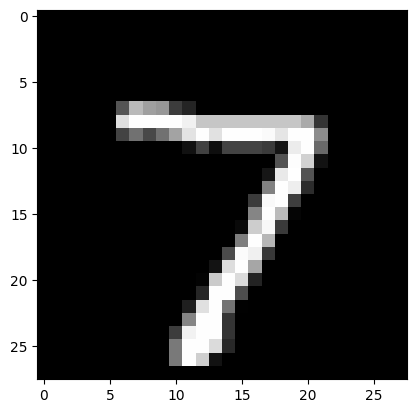

In [56]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

Adding an extra dimension so that batches can be made in an existing image

In [57]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

Making a predict image label function to predict an image label from a single image

In [58]:
def predict_image(img, model):
  xb = img.unsqueeze(0) # Make a batch out of a single image
  yb = model(xb)
  print(yb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Getting the outputs for each of the 10 classes and comparing the predicted and original label of the image along with the plotted image
* For 4 example data

tensor([[ -17.6731, -176.1777,   11.9728,   87.4885,    2.9496,   55.8317,
         -191.6719,  107.8675,   51.7197,   68.0269]],
       grad_fn=<AddmmBackward0>)
Label:  7 Predicted:  7


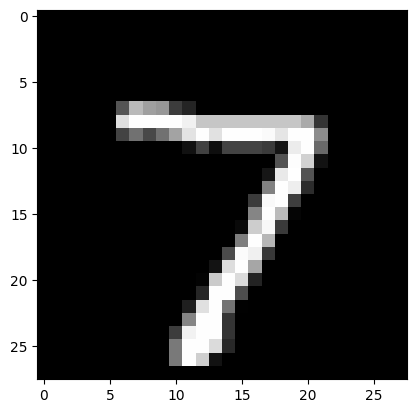

In [59]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, 'Predicted: ', predict_image(img, model))

tensor([[ 161.1853, -224.5736,   47.1975,   25.4146,  -33.1329,   70.8657,
           -3.5267,  -79.3228,   38.9201,   -2.5395]],
       grad_fn=<AddmmBackward0>)
Label:  0 Predicted:  0


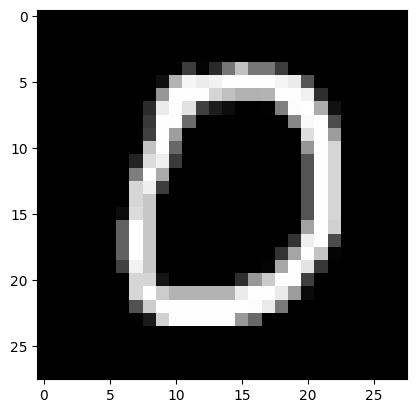

In [60]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, 'Predicted: ', predict_image(img, model))

tensor([[-191.5083, -112.0225,    8.5950,   81.3619,   50.8355,   37.7134,
          -39.0417,   47.0116,   50.5786,   66.9911]],
       grad_fn=<AddmmBackward0>)
Label:  9 Predicted:  3


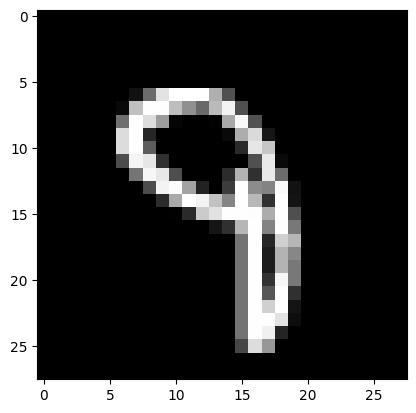

In [61]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, 'Predicted: ', predict_image(img, model))

tensor([[ -78.7803,  -65.9204,   77.2127,   81.6048,  -30.2238,   56.4911,
         -102.1957,   -4.1382,   81.4081,  -15.1275]],
       grad_fn=<AddmmBackward0>)
Label:  2 Predicted:  3


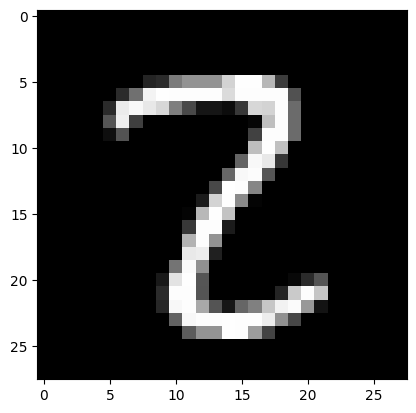

In [62]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, 'Predicted: ', predict_image(img, model))



---



#### Model Testing Final

Computing the validation loss and accuracy for the full Training dataset using a batch loader and using it with the evaluate function

In [63]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 2.067535877227783, 'val_acc': 0.891796886920929}



---



#### Saving the model weights

In [64]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

Extracting the current state of the model weights and biases

In [65]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0290,  0.0146, -0.0241,  ...,  0.0058,  0.0012, -0.0136],
                      [-0.0140,  0.0127,  0.0018,  ...,  0.0201,  0.0149, -0.0092],
                      [-0.0306,  0.0192,  0.0038,  ..., -0.0320,  0.0340,  0.0163],
                      ...,
                      [ 0.0064, -0.0288, -0.0209,  ...,  0.0284,  0.0298,  0.0010],
                      [ 0.0133, -0.0052,  0.0219,  ...,  0.0057,  0.0206,  0.0011],
                      [-0.0275, -0.0274,  0.0296,  ...,  0.0195,  0.0134,  0.0070]])),
             ('linear.bias',
              tensor([-26.0553,  -3.6788,   8.5903,   2.1656,  -4.8189,  32.6867, -11.2341,
                       13.3367, -11.4117,   0.4233]))])

Initializing a model from the class and it will contain random set of weights and biases which will perform very bad on testing dataset

In [66]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0217,  0.0205,  0.0040,  ...,  0.0027,  0.0135, -0.0106],
                      [-0.0128,  0.0100, -0.0070,  ..., -0.0333, -0.0150,  0.0038],
                      [ 0.0281, -0.0294, -0.0228,  ...,  0.0082,  0.0326,  0.0340],
                      ...,
                      [-0.0255,  0.0270,  0.0130,  ...,  0.0219, -0.0221, -0.0292],
                      [-0.0176, -0.0019, -0.0067,  ..., -0.0158, -0.0111, -0.0198],
                      [-0.0220, -0.0087, -0.0107,  ..., -0.0178,  0.0321,  0.0096]])),
             ('linear.bias',
              tensor([-0.0186,  0.0035, -0.0235,  0.0187, -0.0166,  0.0039,  0.0012,  0.0323,
                      -0.0308,  0.0301]))])

Using the evaluate method to check for the random weights model and the testing dataset performance

In [67]:
evaluate(model2, test_loader)

{'val_loss': 2.305480480194092, 'val_acc': 0.07666015625}



---



#### Importing Model Weights from saved filed

In [68]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

<ipython-input-68-6cae89ea314f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic.pth'))


OrderedDict([('linear.weight',
              tensor([[ 0.0290,  0.0146, -0.0241,  ...,  0.0058,  0.0012, -0.0136],
                      [-0.0140,  0.0127,  0.0018,  ...,  0.0201,  0.0149, -0.0092],
                      [-0.0306,  0.0192,  0.0038,  ..., -0.0320,  0.0340,  0.0163],
                      ...,
                      [ 0.0064, -0.0288, -0.0209,  ...,  0.0284,  0.0298,  0.0010],
                      [ 0.0133, -0.0052,  0.0219,  ...,  0.0057,  0.0206,  0.0011],
                      [-0.0275, -0.0274,  0.0296,  ...,  0.0195,  0.0134,  0.0070]])),
             ('linear.bias',
              tensor([-26.0553,  -3.6788,   8.5903,   2.1656,  -4.8189,  32.6867, -11.2341,
                       13.3367, -11.4117,   0.4233]))])

Using the evaluate method to check for the loaded weights model and the testing dataset performance

In [69]:
evaluate(model2, test_loader)

{'val_loss': 2.067535877227783, 'val_acc': 0.891796886920929}